# Embedding Visualization for 'pytorch' and 'torch'

This notebook demonstrates how to generate and visualize embeddings for the words 'pytorch' and 'torch' using three different embedding models:
1. BERT
2. Word2Vec
3. GloVe

In [1]:
import os
os.environ['USE_TORCH'] = '1'
os.environ['NO_TF'] = '1'
os.environ['USE_TF'] = '0'

In [2]:
%pip install numpy matplotlib scikit-learn torch transformers gensim tqdm -q

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 18.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 17.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 17.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 17.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from embeddings import BertEmbedder, Word2VecEmbedder, GloveEmbedder

/Users/tushargupta/miniforge3/envs/tensorflow-apple/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Transformers models are stored in: /Users/tushargupta/.cache/huggingface/hub
Gensim data directory: /Users/tushargupta/gensim-data


In [4]:
def visualize_embeddings(embeddings, title):
    """
    Visualize embeddings in 2D space using PCA
    """
    # Convert embeddings to numpy array
    words = list(embeddings.keys())
    vectors = np.array(list(embeddings.values()))
    
    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)
    
    # Create plot
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='blue', s=100)
    
    # Add word labels
    for i, word in enumerate(words):
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), 
                    xytext=(5, 5), textcoords='offset points')
    
    plt.title(f'{title} Embeddings Visualization')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True)
    plt.show()

In [9]:
words = ['pytorch', 'torch', 'tensorflow', 'numpy', 'light', 'bulb']

embedders = {
    'BERT': BertEmbedder(),
    'Word2Vec': Word2VecEmbedder(),
    'GloVe': GloveEmbedder()
}


Generating BERT embeddings...
Loading bert-base-uncased...
Successfully loaded bert-base-uncased


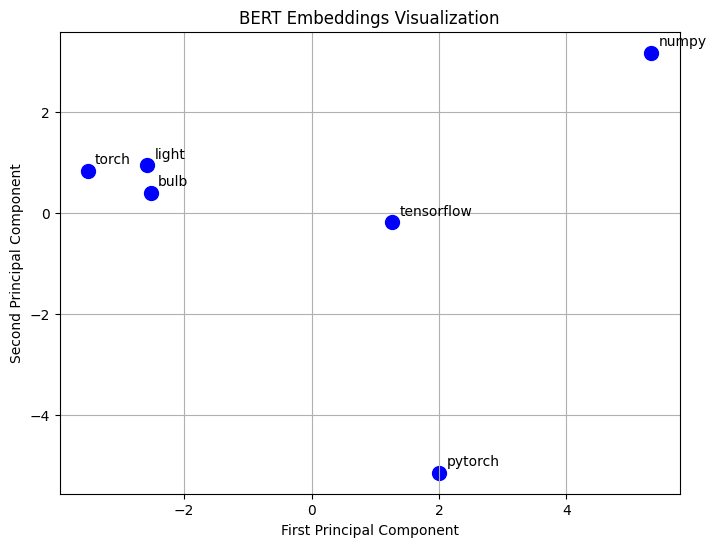


Generating Word2Vec embeddings...
(Down)Loading word2vec-google-news-300...


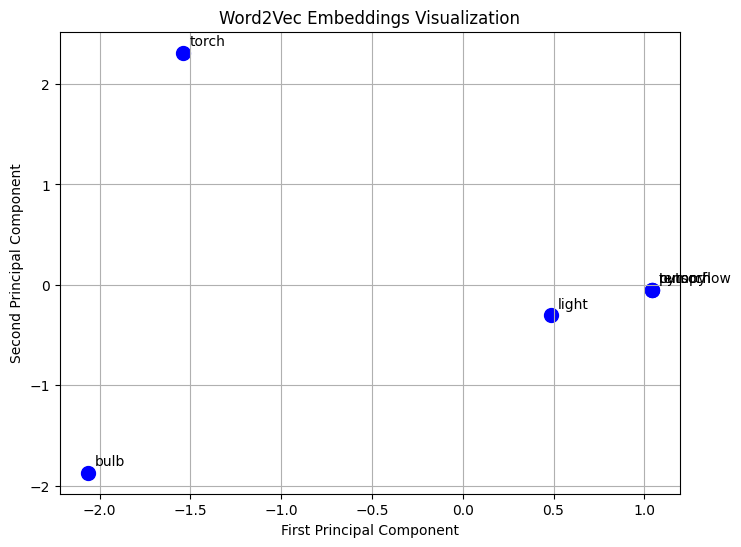


Generating GloVe embeddings...
(Down)Loading glove-wiki-gigaword-100...


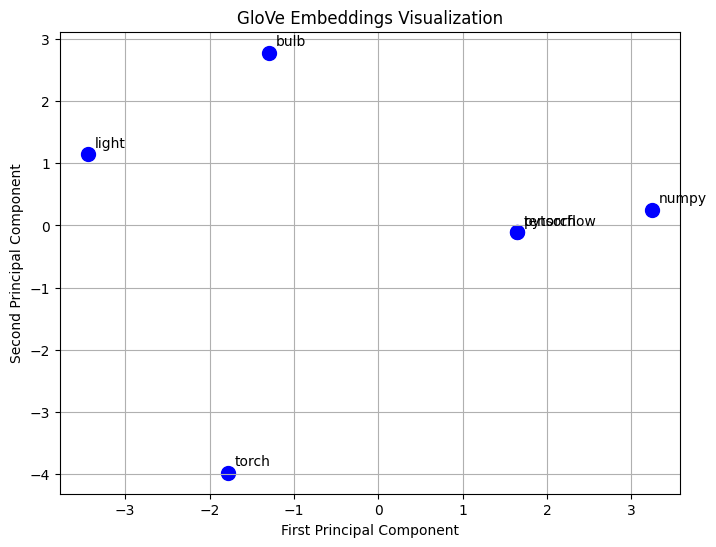

In [10]:
for model_name, embedder in embedders.items():
    print(f"\nGenerating {model_name} embeddings...")
    embeddings = embedder.generate_embeddings(words)
    visualize_embeddings(embeddings, model_name)